In [735]:
'''
1.Importing Libraries

'''
import pandas as pd
import numpy as np
import pandas as pd
import json
import re
import string
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from collections import Counter


In [736]:
 '''DATA PRE-PROCESSING PART-1'''

'DATA PRE-PROCESSING PART-1'

In [737]:
'''
As Stanford data is present in quite complex form with different attributes in 5 files
So,my aim was to just get an (TRAINING,TEST) LIST and (TRAINING,TEST) LABEL

How I achieved clean dataset:
1.Convert SOStr.txt file data in an texts list which contains all examples.
2.Splitlabels contains example id and its part of train,test or label
3.Then from sentiment labels,I created dictionary containing phraseId and sentiment they hold
4.phrase and their is given in dictionary.txt file
'''

def read_text():
    ifname = 'SOStr.txt'
    lines = open(ifname, 'r').read().split('\n')

    texts = []
    for line in lines:
        params = line.split('|')
        if len(params) > 1:
            text = ' '.join(params)
            texts.append(text)

    return texts
texts=read_text()
len(texts)


11855

In [738]:
def read_splitlabel():
    ifname = 'datasetSplit.txt'
    lines = open(ifname, 'r').read().split('\n')

    splitlabels = []
    for line in lines[1:]:
        params = line.split(',')
        if len(params) == 2:
            splitlabels.append(int(params[1]))
    
    return splitlabels
splitlabels=read_splitlabel()
len(splitlabels)


11855

In [739]:
def read_sentiscore():
    ifname = 'sentiment_labels.txt'
    lines = open(ifname, 'r').read().split('\n')

    sentiscores = []
    for line in lines[1:]:
        params = line.split('|')
        if len(params) == 2:
            sentiscores.append(float(params[1]))

    return sentiscores
sentiscores=read_sentiscore()
len(sentiscores)

239232

In [740]:
def read_phraseid():
    ifname = 'dictionary.txt'
    lines = open(ifname, 'r').read().split('\n')

    phraseid = {}
    for line in lines:
        params = line.split('|')
        if len(params) == 2:
            phraseid[params[0]] = int(params[1])

    return phraseid
phraseid=read_phraseid()
# len(phraseid)
# phraseid["The gorgeously elaborate continuation of `` The Lord of the Rings '' trilogy is so huge that a column of words can not adequately describe co-writer\\/director Peter Jackson 's expanded vision of J.R.R. Tolkien 's Middle-earth ."]

In [741]:
def prepare_valence():
    texts = read_text()
    splitlabels = read_splitlabel()
    sentiscores = read_sentiscore()
    phraseid = read_phraseid()

    train_text = []
    train_label = []
    
    valid_text = []
    valid_label = []

    test_text = []
    test_label = []

    n_sample = len(texts)
    if n_sample == len(splitlabels) and len(sentiscores) == len(phraseid):
        print('%d samples'%(n_sample))
    else:
        print('reading fail')

    for i, didx in enumerate(splitlabels):
        if didx == 1:
            list_text = train_text
            list_label = train_label
        elif didx == 3:
            list_text = valid_text
            list_label = valid_label
        elif didx == 2:
            list_text = test_text
            list_label = test_label

        list_text.append(texts[i])
        list_label.append(sentiscores[phraseid[texts[i]]])
        
    return train_text,train_label,test_text,test_label,valid_text,valid_label

In [742]:
def labelize(text,label):
        y = []
        for l in label:
            if l <= 0.2:
                y.append(0)
            elif l <= 0.4:
                y.append(1)
            elif l <= 0.6:
                y.append(2)
            elif l <= 0.8:
                y.append(3)
            else:
                y.append(4)
        print(len(y))
        return (text, y)
train_tx,train_l,test_tx,test_l,valid_tx,valid_l=prepare_valence()
train_text,train_label=labelize(train_tx,train_l)    
test_text,test_label=labelize(test_tx,test_l)
valid_text,valid_label=labelize(valid_tx,valid_l)

11855 samples
8544
2210
1101


In [743]:
'''
Now as I have to use AMAZON Phone datset for final testing so I am merging given
Training and validation set as One TRAIN_CORPUS
'''
Train_corpus=train_tx+valid_tx
Train_label=train_label+valid_label

In [744]:
len(Train_corpus)
len(Train_label)

9645

In [745]:
'''
Now Pre-Processing the reviews
'''

def process_text(text):
    
    # remove stock market tickers like $GE
    text = re.sub(r'\$\w*', '', text)
    # remove old style retweet text "RT"
    text = re.sub(r'^RT[\s]+', '', text)
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # tokenize tweets
    text=text.replace('é','e')
    text=text.replace('é','e')
    text=text.replace('è','e')
    text=text.replace('ï','i')
    text=text.replace('í','i')
    text=text.replace('ó','o')
    text=text.replace('ô','o')
    text=text.replace('ö','o')
    text=text.replace('á','a')
    text=text.replace('â','a')
    text=text.replace('ã','a')
    text=text.replace('à','a')
    text=text.replace('ü','u')
    text=text.replace('û','u')
    text=text.replace('ñ','n')
    text=text.replace('ç','c')
    text=text.replace('æ','ae')
    text=text.replace('\xa0', ' ')
    text=text.replace('\xc2', '')
    return text

In [746]:
'''Now cleaning training corpus to remove unwanted words and punctuations'''
for i,line in enumerate(Train_corpus):
    Train_corpus[i]=process_text(line)
for i,line in enumerate(test_text):
    test_text[i]=process_text(line)

<Figure size 720x504 with 0 Axes>

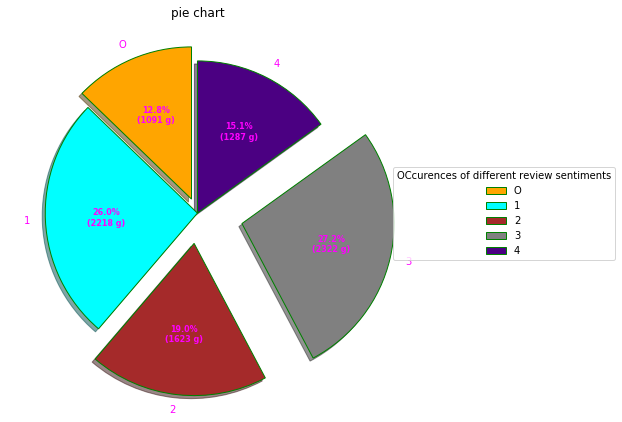

In [747]:
                                '''  EXPLORATORY DATA ANALYSIS(EDA) PART 2  '''
    
#USING PIE CHART TO VIEW HOW MANY TIMES DIFFERENT SENTIMENT OCCUR
count=Counter(train_label)
fig=plt.figure(figsize=(10,7))
occurence_list=[count[0],count[1],count[2],count[3],count[4]]
label_for_pie=['O','1','2','3','4']
# Creating explode data 
explode = (0.1, 0.0, 0.2, 0.3, 0.0) 
  # Creating color parameters 
colors = ( "orange", "cyan", "brown", 
          "grey", "indigo") 
# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  # Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  # Creating plot 
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(occurence_list,  
                                  autopct = lambda pct: func(pct, occurence_list), 
                                  explode = explode,  
                                  labels = label_for_pie, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="magenta")) 
  # Adding legend 
ax.legend(wedges, label_for_pie, 
          title ="OCcurences of different review sentiments", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("pie chart") 
  # show plot 
plt.show() 

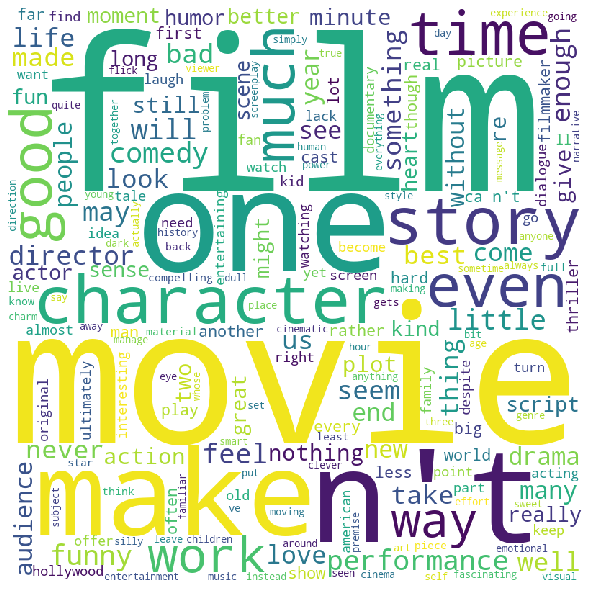

In [748]:
#Word-cloud to visualise most frequent words
from wordcloud import WordCloud, STOPWORDS 
comment_words = '' 
stopwords = set(STOPWORDS) 

for val in Train_corpus: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
# plot the WordCloud image                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


In [749]:
def build_freqs(texts, ys):
    """Build frequencies.
    
    Output will be:
        freqs: a dictionary mapping each (word, sentiment[label 0 or 1]) pair to its
        frequency
    """
    
    # The squeeze is necessary or the list ends up with one element.
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, text in zip(yslist, texts):
        for word in process_text(text):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [750]:
#Checking top 10 words
freqs_train = build_freqs(Train_corpus,Train_label)
WORDS=Counter(freqs_train)
WORDS.most_common(10)

[((' ', 3), 48855),
 ((' ', 1), 45553),
 ((' ', 2), 32386),
 ((' ', 4), 26021),
 (('e', 3), 24762),
 (('e', 1), 23231),
 ((' ', 0), 22381),
 (('t', 3), 19645),
 (('t', 1), 18193),
 (('a', 3), 17625)]

In [751]:
'''
NOW I have  MANIPULATED THE DATASET TO FIT ACCORDING TO MODEL

'''
'''
POSITIVE means review id 2,3,4
NEGATIVE means review id 0,1
Then for binary classification POSITIVE becames 1
                               Neagtive becomes 0
'''

def changing_labels(t_label):
    for i,label in enumerate(t_label):
        if label==1:
            t_label[i]=0
        elif label==2 or label==3 or label==4:
            t_label[i]=1   
    count_positive_reviews=0
    count_negative_reviews=0
    for label in t_label:
        if label==1:
            count_positive_reviews+=1
        else:
            count_negative_reviews+=1
    return t_label,count_positive_reviews,count_negative_reviews

In [752]:
Train_label,count_positive_reviews,count_negative_reviews=changing_labels(Train_label)
test_label,count_positive_reviews_TEST,count_negative_reviews_TEST=changing_labels(test_label)

In [753]:
print("Number of positive reviews are {}".format(count_positive_reviews))
print("Number of negative reviews are {}".format(count_negative_reviews))

Number of positive reviews are 5907
Number of negative reviews are 3738


In [754]:
print("Number of positive reviews are {}".format(count_positive_reviews_TEST))
print("Number of negative reviews are {}".format(count_negative_reviews_TEST))

Number of positive reviews are 1298
Number of negative reviews are 912


In [755]:
print("Number of examples in Train_corpus {}".format(len(Train_corpus)))
print("Number of examples in Train_corpus {}".format(len(test_text)))

Number of examples in Train_corpus 9645
Number of examples in Train_corpus 2210


In [756]:
len(Train_corpus)

9645

In [757]:
len(Train_label)

9645

In [758]:
                              ''' Model Making and fitting data PART3'''

' Model Making and fitting data PART3'

In [759]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re

In [760]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    Train_corpus, Train_label, random_state=57643892, test_size=0.2)

In [761]:
len(train_texts)


7716

In [762]:
len(train_labels)

7716

In [763]:
MAX_FEATURES = 12000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_texts)
train_texts = tokenizer.texts_to_sequences(train_texts)
val_texts = tokenizer.texts_to_sequences(val_texts)
test_texts = tokenizer.texts_to_sequences(test_text)

In [764]:
MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
val_texts = pad_sequences(val_texts, maxlen=MAX_LENGTH)
test_texts = pad_sequences(test_texts, maxlen=MAX_LENGTH)

In [765]:
train_texts=np.array(train_texts)
val_texts=np.array(val_texts)
train_labels=np.array(train_labels)
val_labels=np.array(val_labels)

In [766]:
def build_rnn_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
    x = layers.LSTM(128, return_sequences=True)(embedded)
    x = layers.LSTM(128)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
rnn_model = build_rnn_model()

In [834]:
rnn_model.fit(
    train_texts, 
    train_labels, 
    batch_size=128,
    epochs=1,
    validation_data=(val_texts, val_labels), )

61/61 [==============================] - 29s 471ms/step - loss: 0.1801 - binary_accuracy: 0.9305 - val_loss: 0.8056 - val_binary_accuracy: 0.7237


In [835]:
test_texts=np.array(test_texts)
test_labels=np.array(test_label)

In [836]:
preds = rnn_model.predict(test_texts)
print('Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5))))
print('F1 score: {:0.4}'.format(f1_score(test_labels, 1 * (preds > 0.5))))
print('ROC AUC score: {:0.4}'.format(roc_auc_score(test_labels, preds)))

Accuracy score: 0.7362
F1 score: 0.7777
ROC AUC score: 0.8028


In [770]:
                                       '''WEB SCRAPPING PART 4'''

'WEB SCRAPPING PART 4'

In [846]:
'''
For scrapping task I have to scrap review of 10 phones with each having 10 reviews.
So,The testing will be done on total 100 reviews.
'''
import requests
from bs4 import BeautifulSoup  #I found beautiful soup more faster and easier to use than others.


In [847]:
url_links=[
     'https://www.amazon.in/OnePlus-Nord-Marble-128GB-Storage/product-reviews/B086977J3K/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
  'https://www.amazon.in/Apple-iPhone-Xs-512GB-Space/product-reviews/B07J3CJH8S/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews',
  'https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/product-reviews/B089MQ7C7V/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/OPPO-Storage-Additional-Exchange-Offers/product-reviews/B086KF4FYC/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/product-reviews/B07HGGYWL6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/Redmi-8A-Dual-Blue-Storage/product-reviews/B07X4R63DF/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/TECNO-Spark-Comet-Black-Storage/product-reviews/B08HX4RKR1/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/Apple-iPhone-11-64GB-White/product-reviews/B07XVMCLP7/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/Nokia-5-3-Android-Smartphone-64/product-reviews/B08GT28WQQ/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
    ,'https://www.amazon.in/Redmi-Note-Pebble-Grey-Storage/product-reviews/B086977TR6/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
]
url_names=['One Plus Nord 5G','iPhone Xs','Samsung Galaxy Note 20 Ultra 5G','oppo A11K',
           'Samsung Galaxy M31','Redmi 8A dual','Tecno Spark 6 Air','iPhone 11','Nokia 5.3 Android One Smartphone'
          ,'Redmi Note 9 (Pebble Grey, 4GB RAM 64GB Storage)']


In [848]:
def content_request(link):
    page=requests.get(link)
    soup=BeautifulSoup(page.content,'html.parser')
    rating=soup.find_all('i',class_='review-rating')
    review=soup.find_all('span',{"data-hook":"review-body"})
    reviews=cleaner(review)
    ratings=cleaner(rating)
    ratings.pop(0)
    ratings.pop(0)
    
    return ratings,reviews
                         
    

In [849]:
def cleaner(corpus):
    list_to_append=[]
    for i in range(0,len(corpus)):
        list_to_append.append(corpus[i].get_text())
        
    list_to_append[:]=[text.strip('\n') for text in list_to_append]
    
    return list_to_append

In [850]:
Test_corpus=[]
Test_labels=[]
count=0
for i in range(0,len(url_links)):
    link=url_links[i]
    rate,text=content_request(link)
    
    Test_corpus+=text
    Test_labels+=rate

In [851]:
len(Test_corpus)

100

In [852]:
len(Test_labels)

100

In [778]:
Test_labels[:]=[t[0] for t in Test_labels]
for i in range(0, len(Test_labels)): 
    Test_labels[i] = int(Test_labels[i]) 
    if Test_labels[i]==1 or Test_labels[i]==2:
        Test_labels[i]=0
    else:
        Test_labels[i]=1

In [779]:
for i,line in enumerate(Test_corpus):
    Test_corpus[i]=process_text(line)

In [780]:
Phone_reviews=Test_corpus
Phone_rating=Test_labels

In [781]:
Test_corpus = tokenizer.texts_to_sequences(Test_corpus)
Test_corpus = pad_sequences(Test_corpus, maxlen=MAX_LENGTH)
Test_corpus=np.array(Test_corpus)
Test_labels=np.array(Test_labels)

In [782]:
len(Test_corpus)
# len(Test_labels)

100

In [837]:
Amazon_predicts = rnn_model.predict(Test_corpus)
print('Accuracy score: {:0.4}'.format(accuracy_score(Test_labels, 1 * (Amazon_predicts > 0.5))))
print('F1 score: {:0.4}'.format(f1_score(Test_labels, 1 * (Amazon_predicts > 0.5))))
# print('ROC AUC score: {:0.4}'.format(roc_auc_score(Test_labels, preds)))

Accuracy score: 0.66
F1 score: 0.6731


In [838]:
Predicted_values=[]
for i,v in enumerate(Amazon_predicts):
    if v>0.5:
        Predicted_values.append(1)
    else:
        Predicted_values.append(0)

In [839]:
True_predictions=0
False_predictions=0
for i,v in enumerate(Predicted_values):
    if Train_label[i]==v:
        True_predictions+=1
    else:
        False_predictions+=1

In [840]:
True_predictions

47

In [841]:
False_predictions

53

In [844]:
df = pd.DataFrame(list(zip(url_names,Phone_reviews, Phone_rating,Amazon_predicts,Predicted_values)), 
               columns =['Phone name','Review', 'Given Rating','Predicted output','After threshold)']) 

In [845]:
df

,Phone name,Review,Given Rating,Predicted output,After threshold)
0,One Plus Nord 5G,"Pros:1) Clean and bloatfree OxygenOS, which ...",1,[0.9974665],1
1,iPhone Xs,It's not very often I leave a critical revie...,1,[0.14815426],0
2,Samsung Galaxy Note 20 Ultra 5G,Battery usage update: Drains faster than oth...,1,[0.9994],1
3,oppo A11K,"Yea..pre-ordered on 28 July, got it on 4 Aug...",1,[0.97917914],1
4,Samsung Galaxy M31,Heavily disappointed. So much of hype and th...,0,[0.6576555],1
5,Redmi 8A dual,"Got it delivered yesterday , used for about ...",1,[0.9902499],1
6,Tecno Spark 6 Air,I bought this phone for augmented reality pu...,0,[0.0085361],0
7,iPhone 11,An amazing phone!Got it delivered today and ...,1,[0.110584706],0
8,Nokia 5.3 Android One Smartphone,"Front camera is very bad , and low light pho...",0,[0.8502097],1
9,"Redmi Note 9 (Pebble Grey, 4GB RAM 64GB Storage)",ProSmooth OS - no lags at allAMOLED screen i...,1,[0.0006894469],0
